In [1]:
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [8]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [62]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

In [14]:
def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

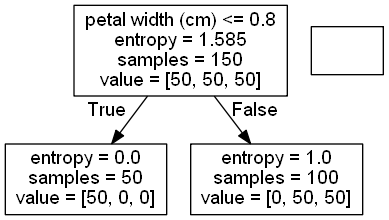

In [15]:
draw_decision_tree(tree1)

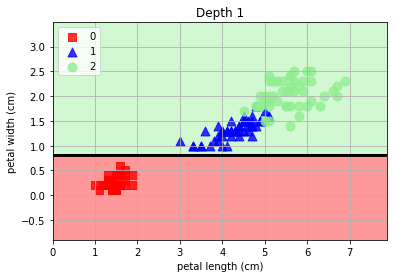

In [17]:
plot_decision_regions(X, y, tree1, 'Depth 1')
plt.grid(True)
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]], dtype=int64)

In [19]:
tree2 = DecisionTreeClassifier(
    criterion='entropy', max_depth=2, random_state=0).fit(X, y)

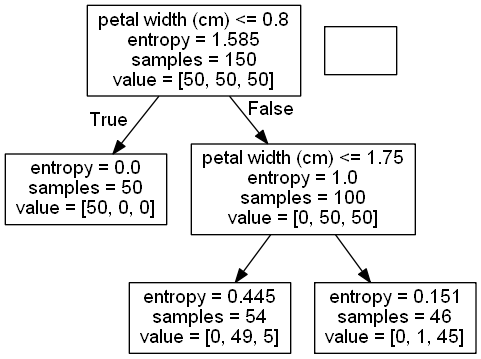

In [20]:
draw_decision_tree(tree2)

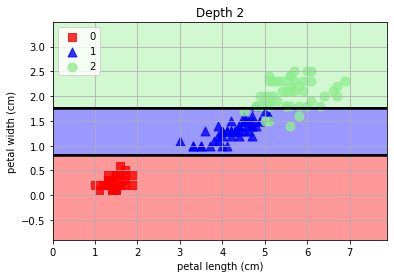

In [22]:
plot_decision_regions(X, y, tree2, 'Depth 2')
plt.grid(True)
plt.show()

In [23]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

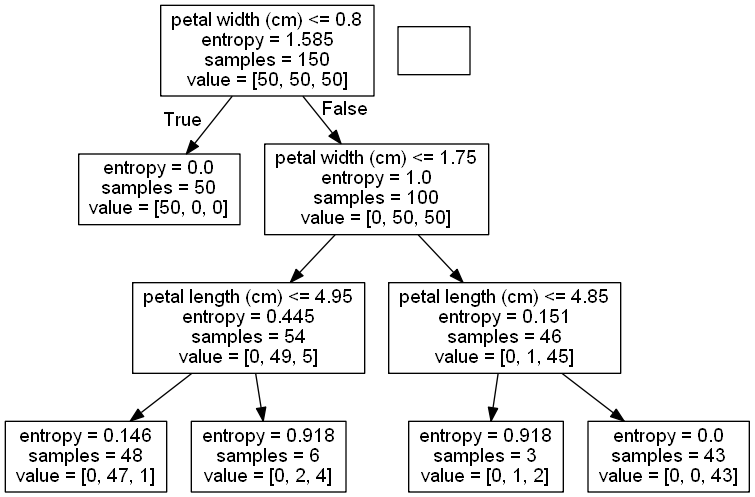

In [24]:
tree3 = DecisionTreeClassifier(
    criterion = 'entropy', max_depth=3, random_state=0).fit(X, y)
draw_decision_tree(tree3)

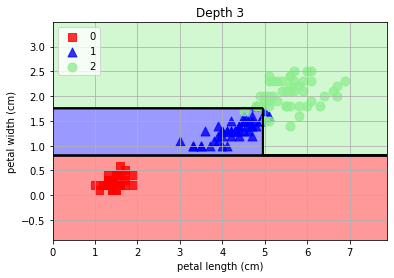

In [26]:
plot_decision_regions(X, y, tree3, 'Depth 3')
plt.grid(True)
plt.show()

In [27]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

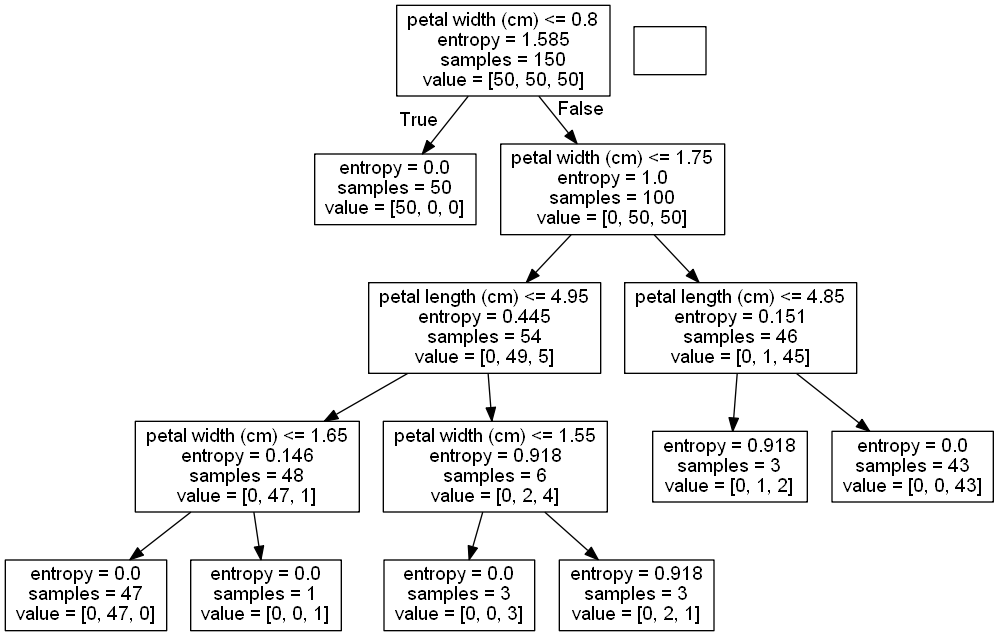

In [28]:
tree4 = DecisionTreeClassifier(
    criterion='entropy', max_depth=4, random_state=0).fit(X, y)
draw_decision_tree(tree4)

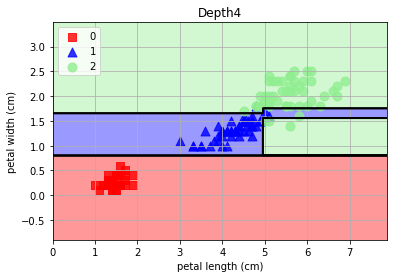

In [30]:
plot_decision_regions(X, y, tree4, 'Depth4')
plt.grid(True)
plt.show()

In [31]:
confusion_matrix(y, tree4.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]], dtype=int64)

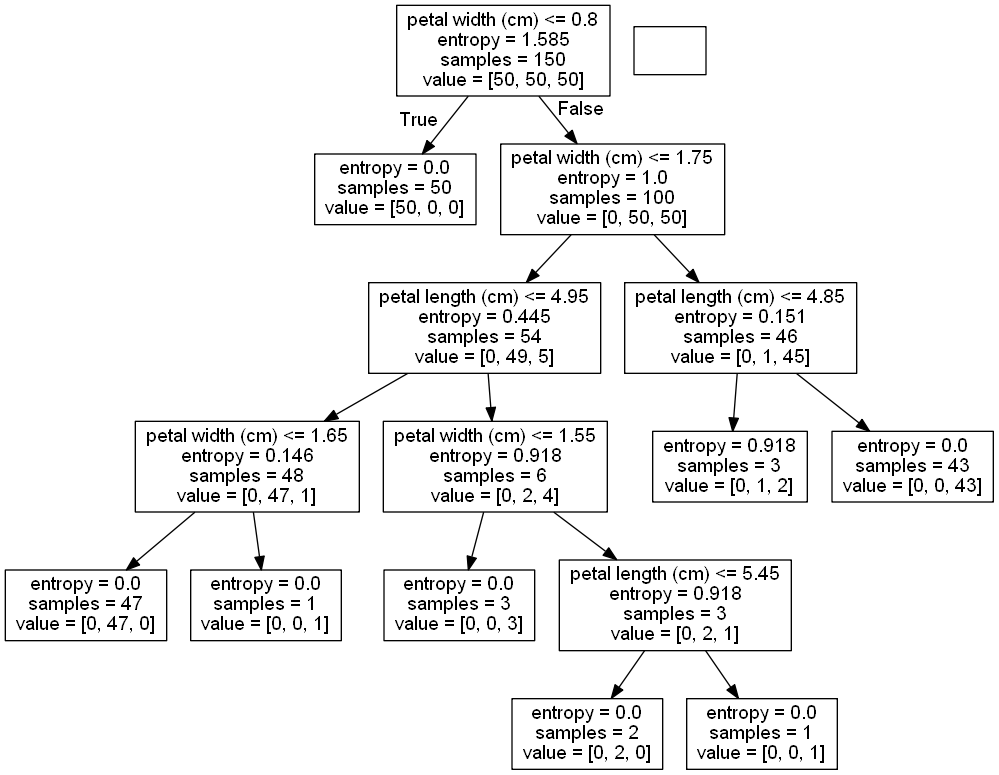

In [32]:
tree5 = DecisionTreeClassifier(
    criterion = 'entropy', max_depth=5, random_state=0).fit(X, y)
draw_decision_tree(tree5)

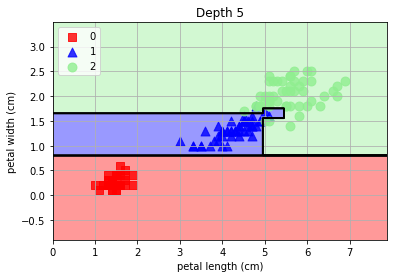

In [34]:
plot_decision_regions(X, y, tree5, 'Depth 5')
plt.grid(True)
plt.show()

In [35]:
confusion_matrix(y, tree5.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]], dtype=int64)

## 연습문제 1
- 붓꽃 분류 문제에서 꽃받침의 길이와 폭(sepal length, sepal width)을 사용하여 max_depth=3인 의사결정나무 모형을 만들고 정확도(accuracy)를 계산하라.
- K = 5인 교차 검증을 통래 테스트 성능 평균을 측정하라.
- max_depth 인수를 바꾸어 가면서 테스트 성능 평균을 구하여 cross validation curve를 그리고 가장 테스트 성능 평균이 좋은 max_depth 인수를 찾아라. 


In [36]:
from sklearn.datasets import load_iris

iris = load_iris()
X1 = iris.data
y1 = iris.target
X1 = X1[:, :2]

from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(max_depth=3).fit(X1, y1)
y1_pred = model1.predict(X1)

from sklearn.metrics import accuracy_score

accuracy_score(y1, y1_pred)

0.8133333333333334

In [37]:
from sklearn.model_selection import cross_val_score

cross_val_score(model1, X1, y1, scoring='accuracy', cv=5).mean()

0.7466666666666666

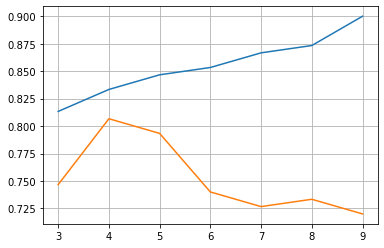

In [42]:
mean_test_accuracy = []
train_accuracy = []
for max_depth in np.arange(3, 10):
    model1 = DecisionTreeClassifier(max_depth=max_depth).fit(X1, y1)
    train_accuracy.append(accuracy_score(y1, model1.predict(X1)))
    mean_test_accuracy.append(cross_val_score(model1, X1, y1, scoring="accuracy", cv=5).mean())
    
    
plt.plot(np.arange(3, 10), train_accuracy)
plt.plot(np.arange(3, 10), mean_test_accuracy)
plt.grid(True)
plt.show()

## 타이타닉호 생존자 예측

In [43]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [44]:
feature_names = ['pclass', 'age', 'sex']
dfX = df[feature_names].copy()
dfy = df['survived'].copy()
dfX.tail()

,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [46]:
from sklearn.preprocessing import LabelEncoder  # 문자를 수치화 male = 1, female = 0
dfX['sex'] = LabelEncoder().fit_transform(dfX['sex'])
dfX.tail()

,pclass,age,sex
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [48]:
dfX['age'].fillna(dfX['age'].mean(), inplace=True) # age 빈칸에 age평균 넣기 
dfX.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [49]:
from sklearn.preprocessing import LabelBinarizer
dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX['pclass']),
                   columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX['pclass'])
dfX.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


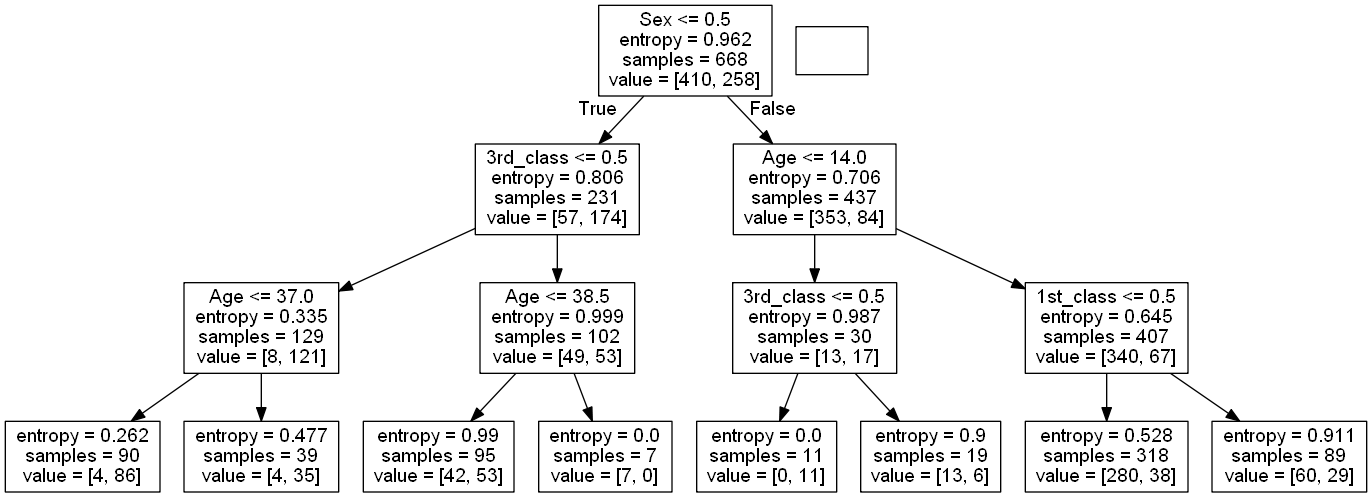

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

model = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)

command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, feature_names=[
                'Age', 'Sex', '1st_class', '2nd_class', '3rd_class'])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

In [51]:
confusion_matrix(y_train, model.predict(X_train))

array([[360,  50],
       [ 73, 185]], dtype=int64)

In [52]:
confusion_matrix(y_test, model.predict(X_test))

array([[119,  20],
       [ 25,  59]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       410
           1       0.79      0.72      0.75       258

    accuracy                           0.82       668
   macro avg       0.81      0.80      0.80       668
weighted avg       0.81      0.82      0.81       668



In [54]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       139
           1       0.75      0.70      0.72        84

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



## Greedy 의사 결정

In [55]:
X = [
    [0, 0, 0],
    [1, 0, 0],
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 0],
    [1, 1, 0],
    [0, 1, 1],
    [1, 1, 1],
]
y = [0,0,1,1,1,1,0,0]

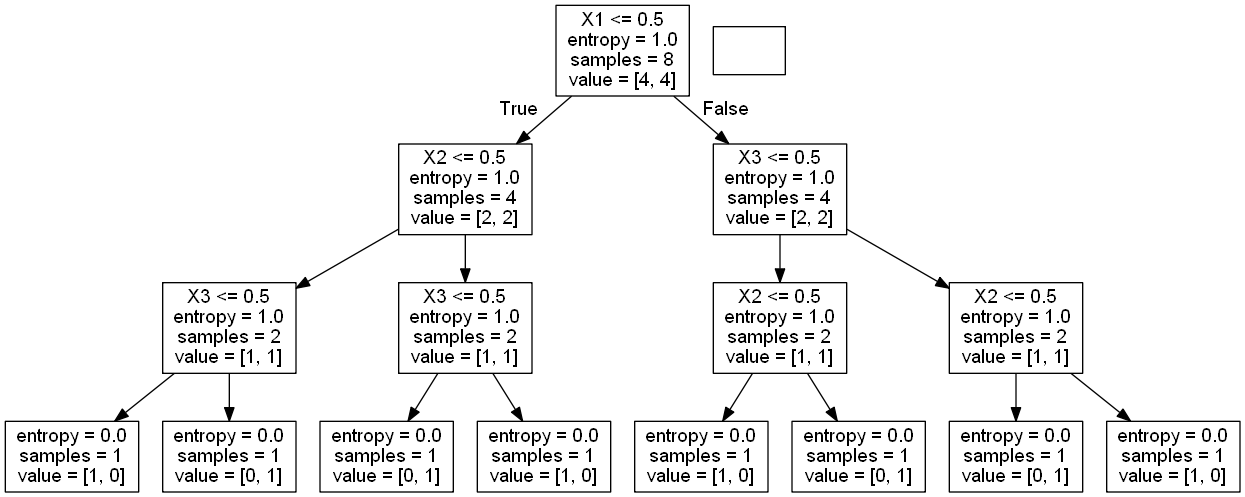

In [56]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2).fit(X, y)
command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, 
                feature_names=["X1", "X2", "X3"])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

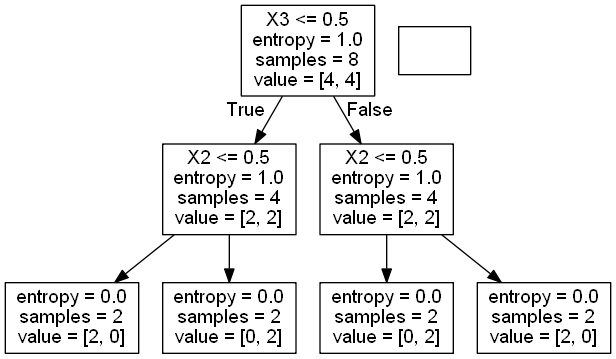

In [57]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=3).fit(X, y)
command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, 
                feature_names=["X1", "X2", "X3"])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

## 회귀 나무

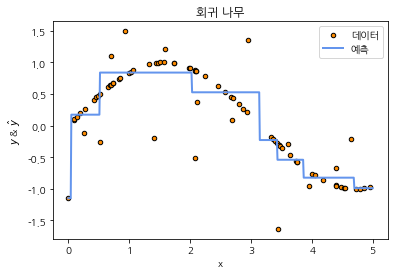

In [63]:
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regtree = DecisionTreeRegressor(max_depth=3)
regtree.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_hat = regtree.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="데이터")
plt.plot(X_test, y_hat, color="cornflowerblue", linewidth=2, label="예측")
plt.xlabel("x")
plt.ylabel(r"$y$ & $\hat{y}$")
plt.title("회귀 나무")
plt.legend()
plt.show()

In [66]:
from sklearn import tree

In [67]:
dot_data = tree.export_graphviz(regtree, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)

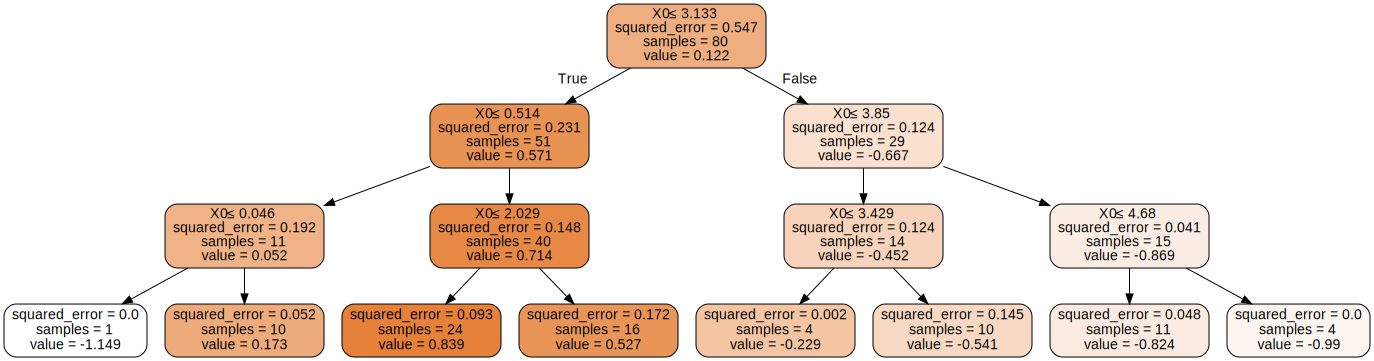

In [69]:
granph = graphviz.Source(dot_data)
granph